## Exploratory Data Analysis on E-Commerce Data(Actual Transaction from UK retailer)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data.csv',engine='python')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.shape

(541909, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
len(data[data.duplicated()])

5268

In [8]:
data.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Data Visualization

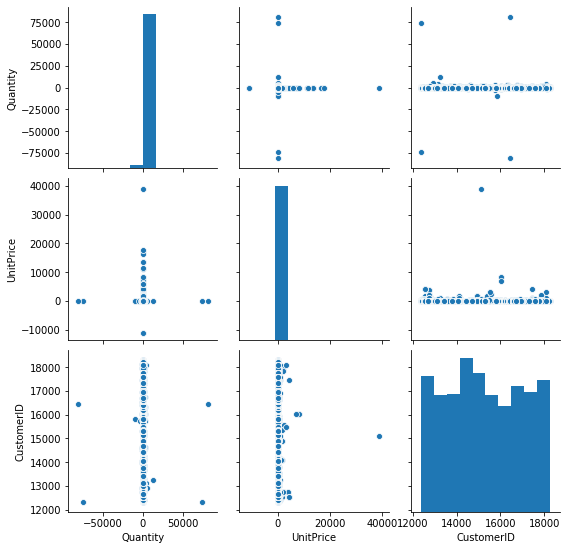

In [9]:
sns.pairplot(data)

In [10]:
data.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


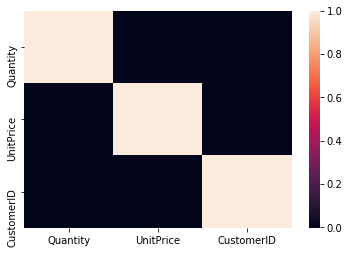

In [11]:
sns.heatmap(data.corr())
plt.show()

#### Most sell product

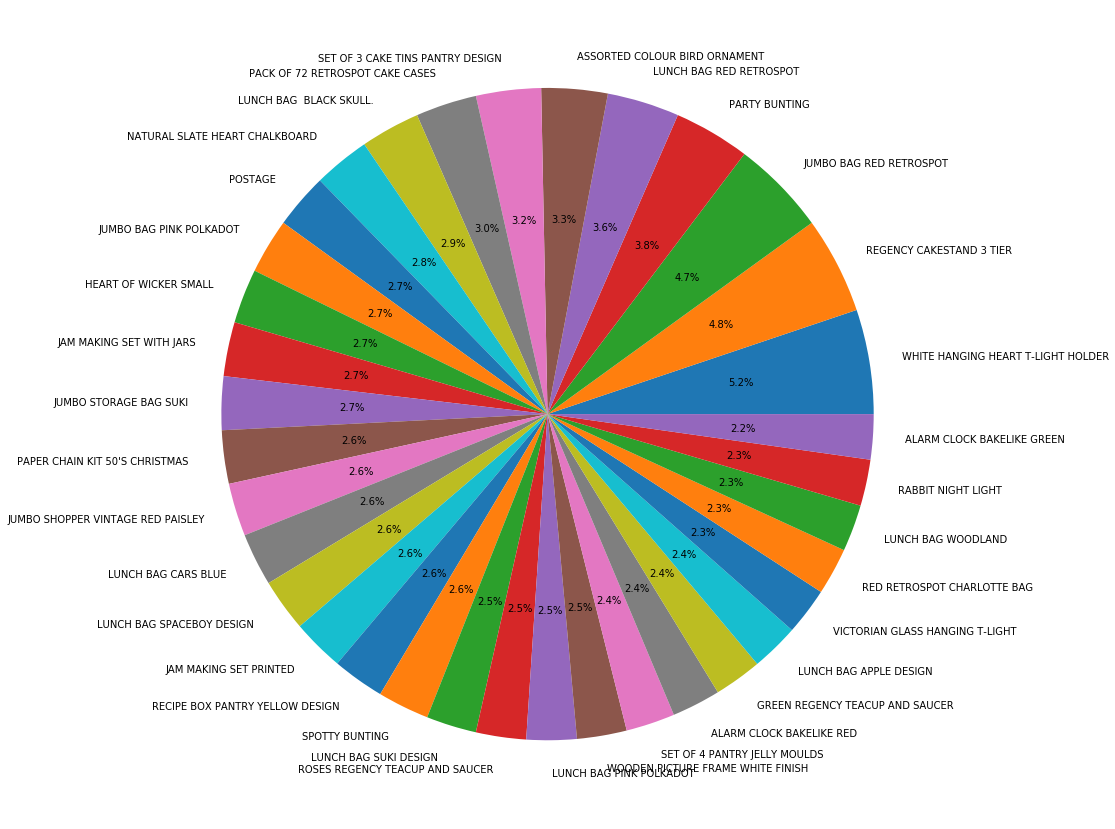

In [12]:
plt.figure(figsize=(15,15))
data['Description'].value_counts()
plt.pie(data['Description'].value_counts()[:35],labels=data['Description'].value_counts()[:35].index,autopct='%1.1f%%')
plt.show()

#### Most selling product according to unit price

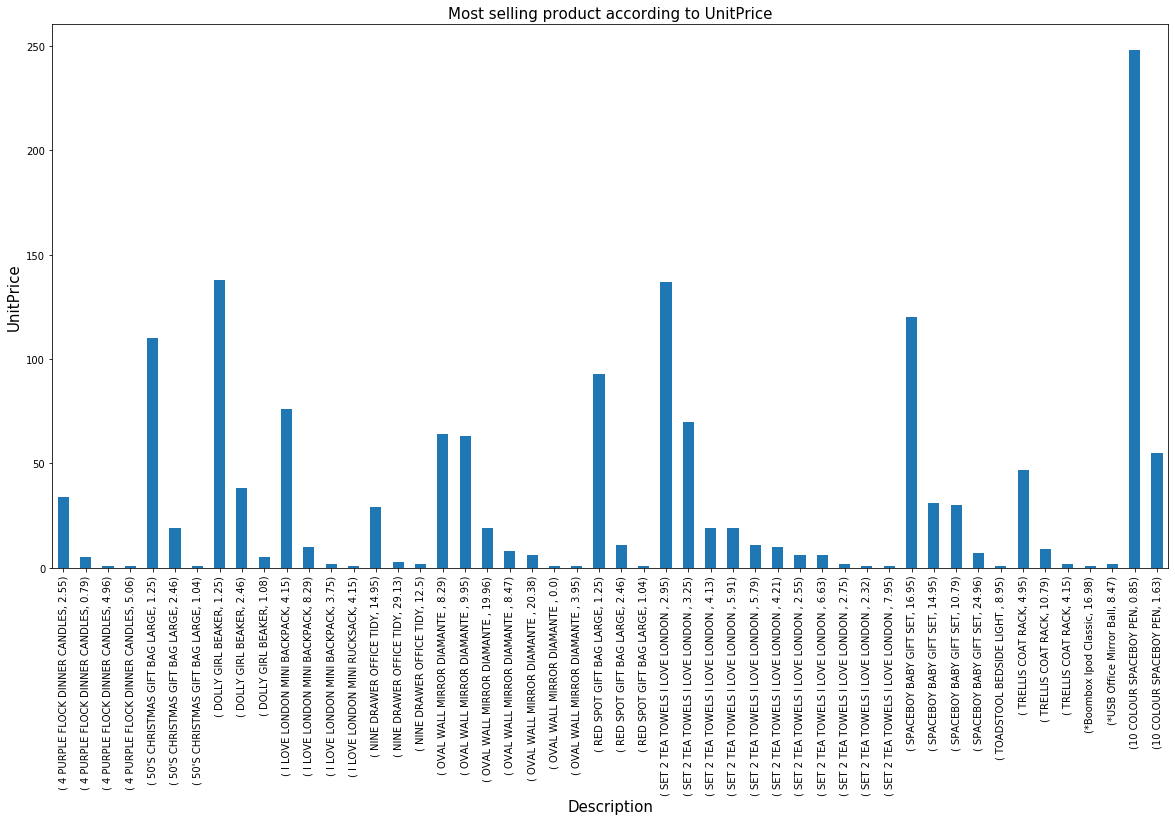

In [13]:
plt.figure(figsize=(20,10))
data.groupby('Description')['UnitPrice'].value_counts()[:50].plot(kind='bar')
plt.title('Most selling product according to UnitPrice',fontsize=15)
plt.xlabel('Description',fontsize=15)
plt.ylabel('UnitPrice',fontsize=15)
plt.show()

##### Among the first 50 product '10 Colour Spaceboy Pen' is the highest selling product and Then comes 'Dolly Girl Beaker' and 'Set 2 Tea Towels I Love London' .

#### Most selling country

In [14]:
country_price=data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


Text(0, 0.5, 'Number of selling product')

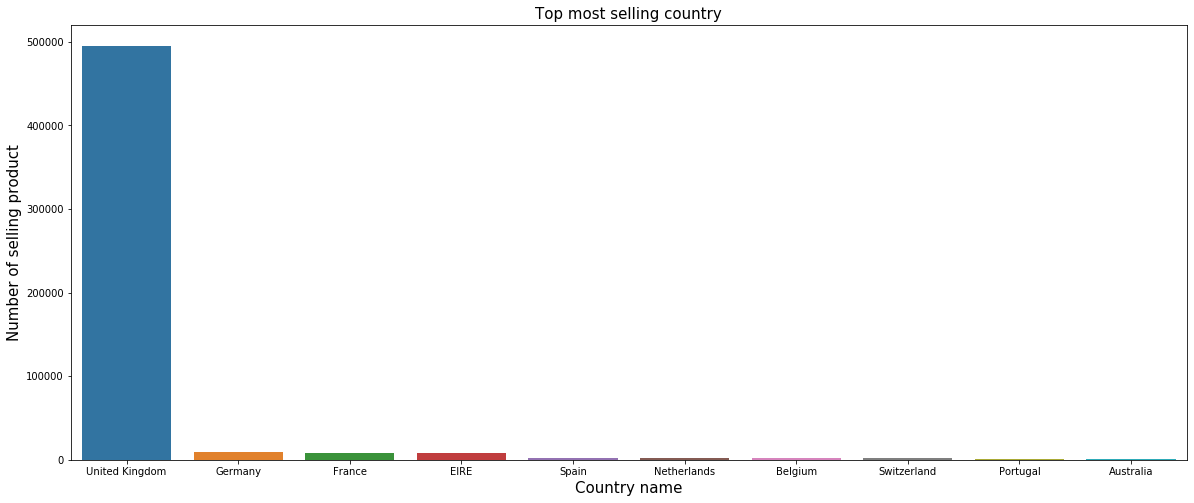

In [15]:
plt.figure(figsize=(20,8))
sns.barplot(x=data['Country'].value_counts()[:10].index,y=data['Country'].value_counts()[:10].values)
plt.title('Top most selling country',fontsize=15)
plt.xlabel('Country name',fontsize=15)
plt.ylabel('Number of selling product',fontsize=15)

##### United Kingdom is the most selling country

### Less product selling countries

Text(0, 0.5, 'Number of selling product')

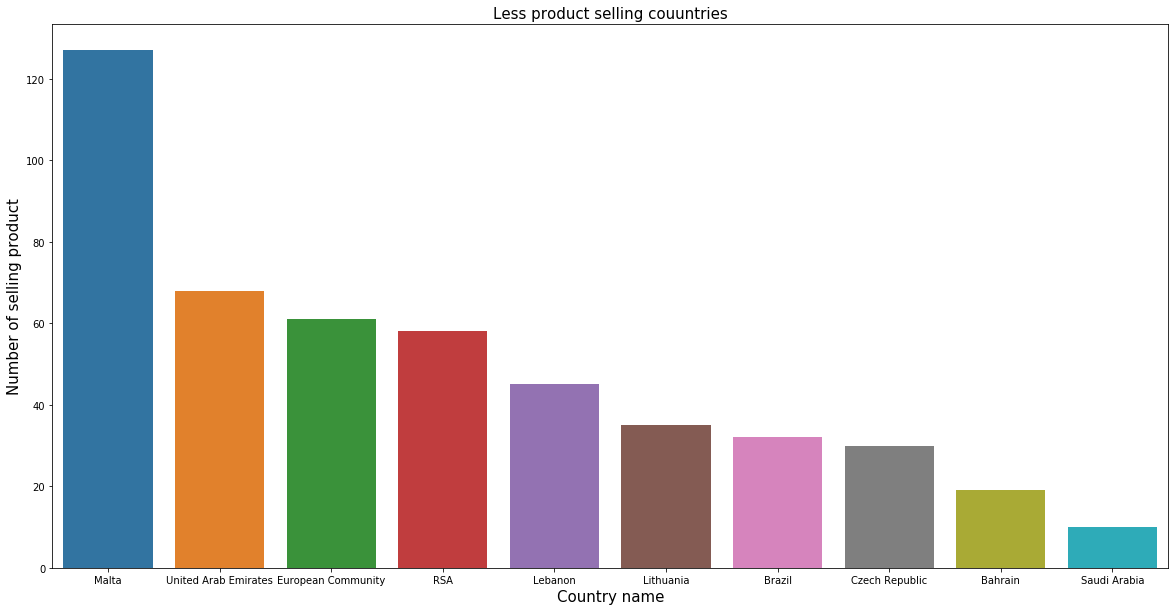

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x=data['Country'].value_counts()[-10:].index,y=data['Country'].value_counts()[-10:].values)
plt.title('Less product selling couuntries',fontsize=15)
plt.xlabel('Country name',fontsize=15)
plt.ylabel('Number of selling product',fontsize=15)

##### Malta is the least selling country

#### Separating the year from InvoiceDate

In [17]:
data['InvoiceDateConv'] = pd.to_datetime(data['InvoiceDate'])
data['year'] = data['InvoiceDateConv'].dt.year
data['month'] = data['InvoiceDateConv'].dt.month

In [18]:
temp= data['year']
data['year']=temp
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateConv,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12


#### Selling quantity in respect of year

Text(0.5, 1.0, 'Selling quantity in each  year')

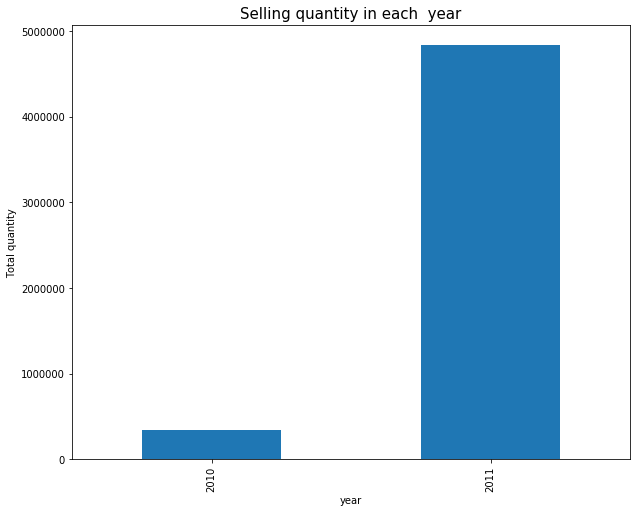

In [19]:
plt.figure(figsize=(10,8))
a=data.groupby('year')['Quantity'].sum().plot(kind='bar')
a
plt.xlabel('year',fontsize=10)
plt.ylabel('Total quantity',fontsize=10)
plt.title('Selling quantity in each  year',fontsize=15)

##### 2011 is the highest selling year

#### Highest selling month

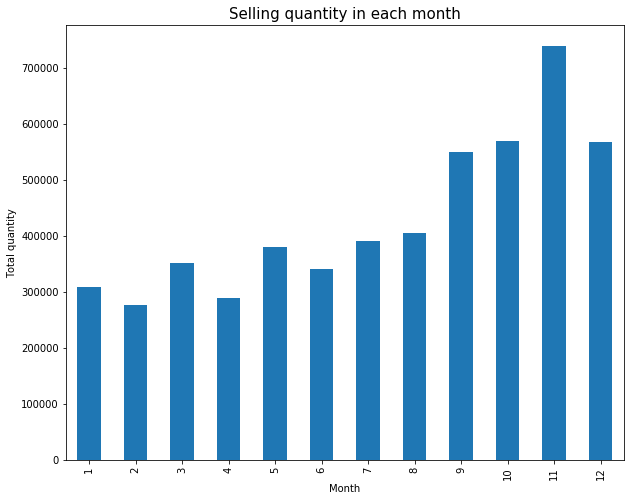

In [20]:
plt.figure(figsize=(10,8))
data.groupby('month')['Quantity'].sum().plot(kind='bar')
plt.xlabel('Month',fontsize=10)
plt.ylabel('Total quantity',fontsize=10)
plt.title('Selling quantity in each month',fontsize=15)
plt.show()

##### So,November is the highest selling month

#### Additional business problem that can be analysed using this data

In [21]:
data2 = data[['CustomerID','InvoiceNo','StockCode','Quantity','InvoiceDate','Country']]

data2 = data.copy()
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateConv,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12


In [22]:
# Removing the null values since we are checking the data based on customer and description
data2 = data2.dropna()
data2.isnull().sum()
data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateConv,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010,12


In [23]:
# Sales Average of each product
avg_sales = data2.groupby(['StockCode','Description'])['Quantity'].mean().sort_values(ascending = False)
avg_sales

StockCode  Description                        
47556B     TEA TIME TEA TOWELS                    1300.000000
84568      GIRLS ALPHABET IRON ON PATCHES          520.000000
84826      ASSTD DESIGN 3D PAPER STICKERS          368.702703
18007      ESSENTIAL BALM 3.5g TIN IN ENVELOPE     325.333333
20914      SET/5 RED SPOTTY LID GLASS BOWLS        288.000000
                                                     ...     
21412      VINTAGE GOLD TINSEL REEL                 -6.000000
79323W     WHITE CHERRY LIGHTS                      -8.000000
21144      PINK POODLE HANGING DECORATION          -12.000000
D          Discount                                -15.506494
21645      ASSORTED TUTTI FRUTTI ROUND BOX         -24.000000
Name: Quantity, Length: 3916, dtype: float64

##### We can see the demand for each product. We can further check month wise on which product is on more demand for which month. If there is any seasonality for the product and further deeper analysis can be carried out customer wise